**Importing Libraries**

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


Exploring the data to get a glimpse of:

- The Data 
- The column names
- Info of the data
- Shape of the data
- Statistical summary of the data
- Missing values
- The duplicates

In [4]:
data = pd.read_csv('QueryResults.csv')
data.head()

,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,OwnerDisplayName,LastEditDate,LastActivityDate
0,39768133,2016-09-29 10:43:48,2,1849,1,Sphinx - what is different between toctree and...,<python><python-sphinx><tableofcontents><toctree>,0,NaN,2020-06-05 20:54:57,2020-06-05 20:54:57
1,39768169,2016-09-29 10:45:13,1,1658,2,Python SSH using Popen,<python><ssh><subprocess><popen>,4,NaN,2016-09-29 11:11:06,2016-09-29 13:14:51
2,39768230,2016-09-29 10:48:38,2,779,2,"Converting python tuple, lists, dictionaries c...",<python><json><pandas>,0,NaN,2016-09-29 11:25:16,2020-04-22 01:59:07
3,1399478,2009-09-09 12:47:15,2,716,1,Django : import problem with python-twitter mo...,<python><django><import><twitter>,0,user166648,2009-09-09 15:11:06,2009-09-09 15:11:06
4,20290527,2013-11-29 17:06:08,2,681,2,Find the minimal common path from any nodes to...,<python><path><shortest>,1,NaN,2015-02-17 03:42:20,2015-02-17 03:42:20


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                50000 non-null  int64 
 1   CreationDate      50000 non-null  object
 2   Score             50000 non-null  int64 
 3   ViewCount         50000 non-null  int64 
 4   AnswerCount       50000 non-null  int64 
 5   Title             50000 non-null  object
 6   Tags              50000 non-null  object
 7   CommentCount      50000 non-null  int64 
 8   OwnerDisplayName  2241 non-null   object
 9   LastEditDate      28950 non-null  object
 10  LastActivityDate  50000 non-null  object
dtypes: int64(5), object(6)
memory usage: 4.2+ MB


In [6]:
# Function for checking percentage of missing values in each column 
# Creates a new column for the datatype of the columns.
def missing_percentage(data):

    # Dictionary for putting percentage of missing values
    missing_values_percentage = {}
    
    # Loop for calculating percentage of missing values and putting values in dictionary
    for column in data.columns:
        missing_values_percentage[column] = data[column].isnull().sum() / len(data[column]) * 100

    # Creating dataframe of the dictionary
    missing_df = pd.Series(missing_values_percentage)
    missing_df = pd.DataFrame(missing_df, columns=['Percentage Missing'])


    # Creating a new column for the dtype of the column with missing values.
    missing_df['dtype'] = [data[column].dtypes for column in missing_df.index]

    return missing_df

In [7]:
# Copy of data to test our new function.
new_df = data.copy()

# Testing
missing_percentage(new_df)

,Percentage Missing,dtype
Id,0.000,int64
CreationDate,0.000,object
Score,0.000,int64
ViewCount,0.000,int64
AnswerCount,0.000,int64
Title,0.000,object
Tags,0.000,object
CommentCount,0.000,int64
OwnerDisplayName,95.518,object
LastEditDate,42.100,object


In [8]:
# Check for missing values
print(data.isnull().sum())


Id                      0
CreationDate            0
Score                   0
ViewCount               0
AnswerCount             0
Title                   0
Tags                    0
CommentCount            0
OwnerDisplayName    47759
LastEditDate        21050
LastActivityDate        0
dtype: int64


In [9]:
# drop missing columns
data = data.dropna(axis=1)
data.head()

,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate
0,39768133,2016-09-29 10:43:48,2,1849,1,Sphinx - what is different between toctree and...,<python><python-sphinx><tableofcontents><toctree>,0,2020-06-05 20:54:57
1,39768169,2016-09-29 10:45:13,1,1658,2,Python SSH using Popen,<python><ssh><subprocess><popen>,4,2016-09-29 13:14:51
2,39768230,2016-09-29 10:48:38,2,779,2,"Converting python tuple, lists, dictionaries c...",<python><json><pandas>,0,2020-04-22 01:59:07
3,1399478,2009-09-09 12:47:15,2,716,1,Django : import problem with python-twitter mo...,<python><django><import><twitter>,0,2009-09-09 15:11:06
4,20290527,2013-11-29 17:06:08,2,681,2,Find the minimal common path from any nodes to...,<python><path><shortest>,1,2015-02-17 03:42:20


In [10]:
# Check for duplicates
print(data.duplicated().sum())

0


In [11]:
# Get summary statistics of the dataset
print(data.describe())

                 Id         Score     ViewCount   AnswerCount  CommentCount
count  5.000000e+04  50000.000000  5.000000e+04  50000.000000  50000.000000
mean   4.703077e+07      5.909240  6.716010e+03      1.610200      2.026820
std    2.137498e+07     96.026845  7.781088e+04      1.966055      2.532325
min    3.370000e+02    -14.000000  4.000000e+00      0.000000      0.000000
25%    3.640979e+07      0.000000  8.400000e+01      1.000000      0.000000
50%    5.303609e+07      0.000000  3.640000e+02      1.000000      1.000000
75%    6.000091e+07      2.000000  1.494000e+03      2.000000      3.000000
max    7.720998e+07  12735.000000  6.083480e+06     86.000000     38.000000


In [12]:

# Convert the 'Tags' column to a string data type
data['Tags'] = data['Tags'].astype(str)

# Remove the '<' and '>' characters from the tags and join them with commas
data['Tags'] = data['Tags'].apply(lambda x: ', '.join(x.strip('<>').split('<>')))

# Replace '><' with a comma and remove trailing commas
data['Tags'] = data['Tags'].str.replace('><', ', ').str.rstrip(',')

# Display the updated DataFrame
data.head()


,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate
0,39768133,2016-09-29 10:43:48,2,1849,1,Sphinx - what is different between toctree and...,"python, python-sphinx, tableofcontents, toctree",0,2020-06-05 20:54:57
1,39768169,2016-09-29 10:45:13,1,1658,2,Python SSH using Popen,"python, ssh, subprocess, popen",4,2016-09-29 13:14:51
2,39768230,2016-09-29 10:48:38,2,779,2,"Converting python tuple, lists, dictionaries c...","python, json, pandas",0,2020-04-22 01:59:07
3,1399478,2009-09-09 12:47:15,2,716,1,Django : import problem with python-twitter mo...,"python, django, import, twitter",0,2009-09-09 15:11:06
4,20290527,2013-11-29 17:06:08,2,681,2,Find the minimal common path from any nodes to...,"python, path, shortest",1,2015-02-17 03:42:20


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                50000 non-null  int64 
 1   CreationDate      50000 non-null  object
 2   Score             50000 non-null  int64 
 3   ViewCount         50000 non-null  int64 
 4   AnswerCount       50000 non-null  int64 
 5   Title             50000 non-null  object
 6   Tags              50000 non-null  object
 7   CommentCount      50000 non-null  int64 
 8   LastActivityDate  50000 non-null  object
dtypes: int64(5), object(4)
memory usage: 3.4+ MB


In [14]:
# Sort CreationDate from latest
data = data.sort_values('CreationDate', ascending=False)

data.head()

,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate
27071,77209981,2023-10-01 09:57:47,0,4,0,Pyenv showing correct pyenv environment but ac...,"python, linux, pyenv, manjaro, pyenv-virtualenv",0,2023-10-01 10:05:37
27070,77209955,2023-10-01 09:44:44,-1,40,1,How to write recursive function to check if ce...,python,10,2023-10-01 10:05:31
27069,77209952,2023-10-01 09:44:03,0,23,0,Generate all binary strings with n-bit?,"python, recursion",2,2023-10-01 09:44:03
27068,77209937,2023-10-01 09:41:12,0,4,0,Fixtures not found pytest,"python, selenium-webdriver, pytest, fixtures",0,2023-10-01 09:41:12
27067,77209928,2023-10-01 09:37:17,0,6,0,Changing python versions in conda env - pip li...,"python, pip, anaconda, conda, miniconda",0,2023-10-01 09:37:17


## Exploratory Data Analysis(EDA)

### Data Distribution
**Visualize the distribution of each numerical column to better understand the nature of the outliers.**


In [15]:
# Convert 'CreationDate' column to datetime format
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

# Extract year and month from 'CreationDate' column
data['Year'] = data['CreationDate'].dt.year
data['Month'] = data['CreationDate'].dt.month
data.head()


,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate,Year,Month
27071,77209981,2023-10-01 09:57:47,0,4,0,Pyenv showing correct pyenv environment but ac...,"python, linux, pyenv, manjaro, pyenv-virtualenv",0,2023-10-01 10:05:37,2023,10
27070,77209955,2023-10-01 09:44:44,-1,40,1,How to write recursive function to check if ce...,python,10,2023-10-01 10:05:31,2023,10
27069,77209952,2023-10-01 09:44:03,0,23,0,Generate all binary strings with n-bit?,"python, recursion",2,2023-10-01 09:44:03,2023,10
27068,77209937,2023-10-01 09:41:12,0,4,0,Fixtures not found pytest,"python, selenium-webdriver, pytest, fixtures",0,2023-10-01 09:41:12,2023,10
27067,77209928,2023-10-01 09:37:17,0,6,0,Changing python versions in conda env - pip li...,"python, pip, anaconda, conda, miniconda",0,2023-10-01 09:37:17,2023,10


**Outliers**

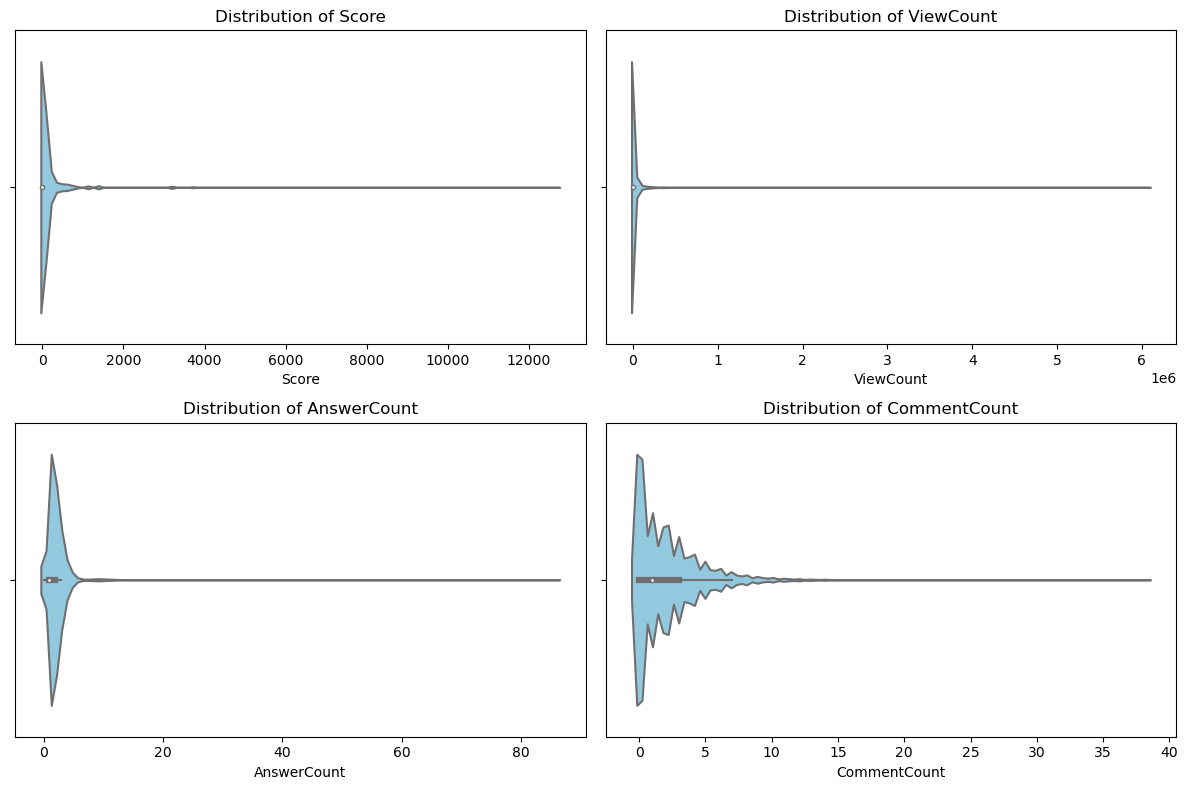

In [16]:
# Select numerical columns for outlier analysis
numeric_columns = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Visualize violin plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x=data[col], color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Interpretation of Violin Plot:

**Width of the Violin:**
The width of the violin at a particular point represents the density of the data at that value.
Wider sections indicate higher density.

**White Dot Inside the Violin:**
The white dot represents the median of the data.

**Box Inside the Violin:**
The box inside the violin represents the interquartile range (IQR), covering the middle 50% of the data.

**Whiskers:**
The whiskers extend from the box and indicate the range of the data, excluding potential outliers.

**Violin Shape:**
The overall shape of the violin shows the distribution of the data. 
For example, if the violin is more stretched on one side, it indicates skewness in the data.

### Interpreting The Specific Violin Plots: 
**Score:**
The violin plot for 'Score' shows a relatively symmetric distribution with a peak around the median. 
The data appears to be concentrated in a specific range.

**ViewCount:**
The 'ViewCount' plot shows a right-skewed distribution, indicating that most posts have a lower view count, but there are some posts with significantly higher view counts.

**AnswerCount:**
The 'AnswerCount' plot has a wider section on the right, suggesting a positive skewness. 
Most posts have a lower answer count, but there are posts with a higher number of answers.

**CommentCount:**
The 'CommentCount' plot is similar to 'AnswerCount' with a positive skewness, indicating that most posts have a lower comment count, but some have a higher count.

**Overall Insights:**
- The violin plots provide a visual summary of the distribution of each numerical column.
- They help identify patterns, skewness, and the spread of values in the dataset.
- Outliers can be visually inspected, especially if there are extended tails in the violins

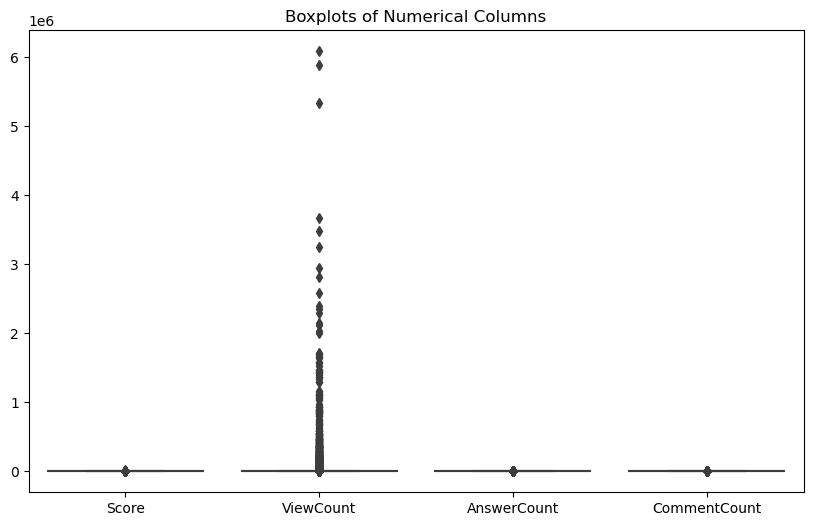

In [17]:
# Select numerical columns for outlier analysis
numeric_columns = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Visualize boxplots for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplots of Numerical Columns')
plt.show()

In [18]:
# Identify and display rows with potential outliers
outliers = pd.DataFrame()
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify potential outliers
    potential_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Add to the outliers DataFrame
    outliers = pd.concat([outliers, potential_outliers])

# Display rows with potential outliers
print("Rows with potential outliers:")
outliers.head()


Rows with potential outliers:


,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate,Year,Month
27317,77209269,2023-10-01 04:41:37,-4,43,0,How do I use a temporary email address using P...,"python, email, temporary",1,2023-10-01 04:47:30,2023,10
27204,77208697,2023-09-30 22:58:08,-4,25,1,Automate login into to DraftKings,"python, automated-deploy",0,2023-09-30 23:38:50,2023,9
27110,77208511,2023-09-30 21:28:24,-4,25,0,Triangle blob detection cv2 in python,"python, opencv, image-processing, object-detec...",1,2023-09-30 22:02:19,2023,9
27109,77208495,2023-09-30 21:18:11,-5,43,0,Python: Str object is not callable,python,8,2023-09-30 21:19:03,2023,9
26965,77208248,2023-09-30 19:52:26,-4,35,0,How can I solve the problem of floor and facil...,"python, python-2.7",1,2023-09-30 19:54:21,2023,9


In [19]:
# Display the total number of rows with potential outliers
total_rows_with_outliers = outliers.shape[0]
print(f"\nTotal number of rows with potential outliers: {total_rows_with_outliers}")


Total number of rows with potential outliers: 17278


In [20]:
data.shape

(50000, 11)

If we happen to drop the outliers then the rows == 32,722, hence, dropping these outliers will affect our project analysis so we decided not to drop them.

### Univariate Analysis
**TAG ANALYSIS**

**Analyze the Tags column to identify the most popular tags and combinations of tags. This could help in understanding the common topics discussed in the questions.**

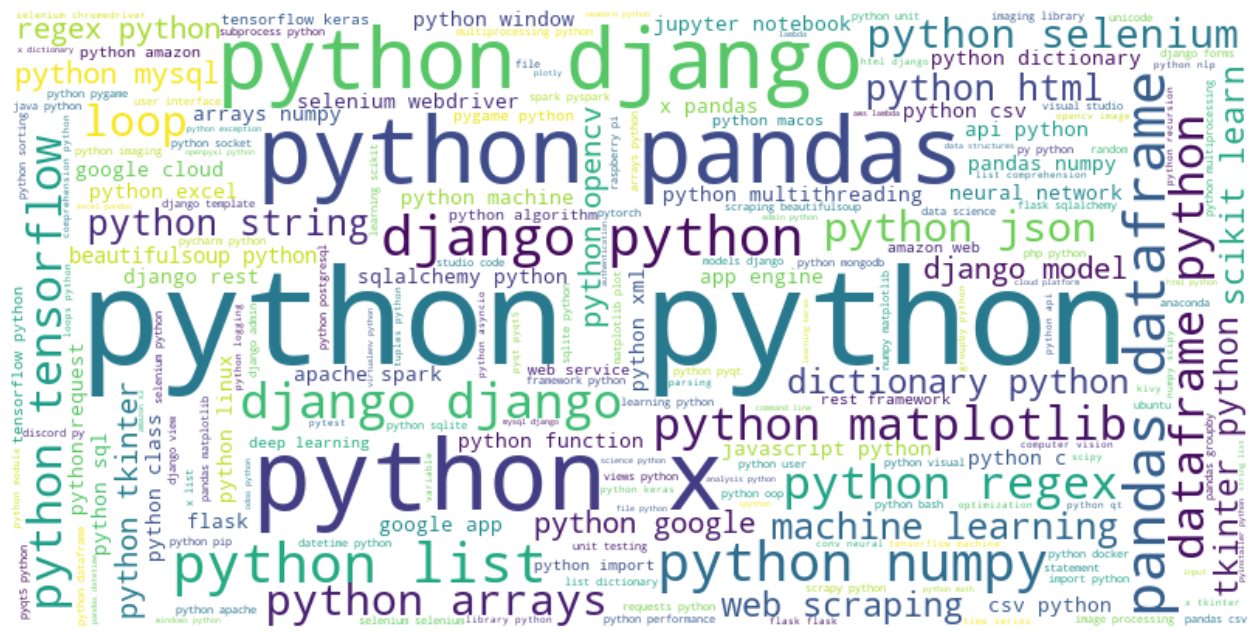

In [21]:
# Combine all tags into a single string
all_tags = ','.join(data['Tags'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

# Display the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

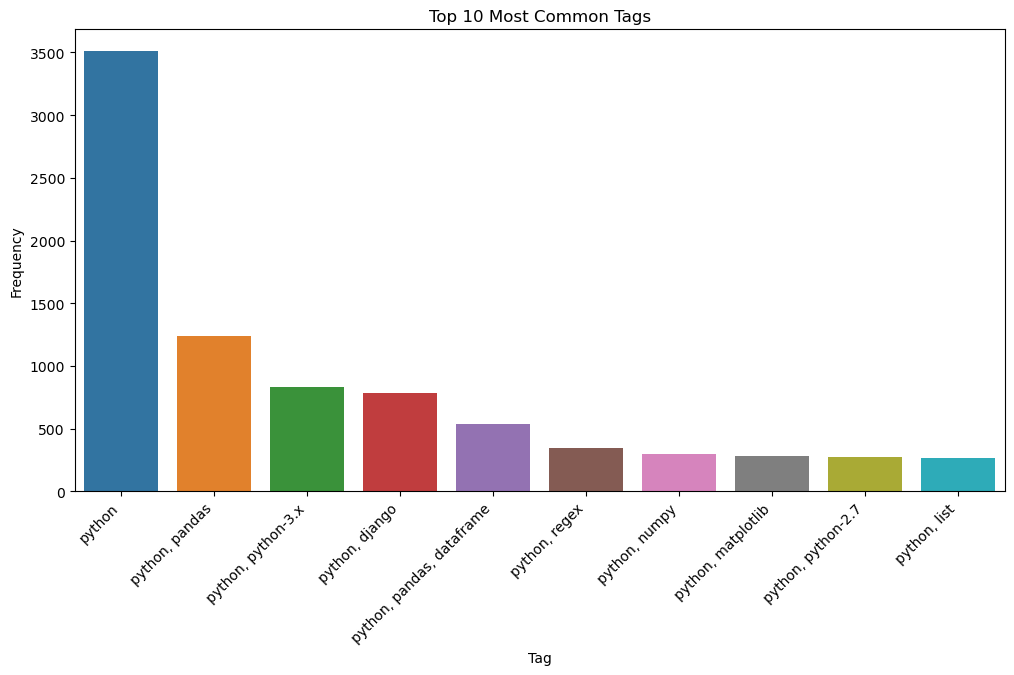

In [22]:
# Extract individual tags from the 'Tags' column
tags_list = [tag.strip('<').strip('>') for tags in data['Tags'].str.split('><') if isinstance(tags, list) for tag in tags]

# Count the frequency of each tag
tag_counts = Counter(tags_list)

# Extract the most common tags (top 10)
top_tags = tag_counts.most_common(10)  

# Create a bar plot for the most common tags using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=[tag[0] for tag in top_tags], y=[tag[1] for tag in top_tags])

plt.title('Top 10 Most Common Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.show()

**Python is the most common tag**

### Interpretation:

- The x-axis represents individual tags
- The y -axis represents the frequency(number of occurences) of each tag.


The Bar plot:
-Tags with a higher bars are used more frequently when posting question e.g `python`, `pandas` etc.
-The top tags identified in the bar plot are the most commonly used tags in the questions.


### Categorical_features


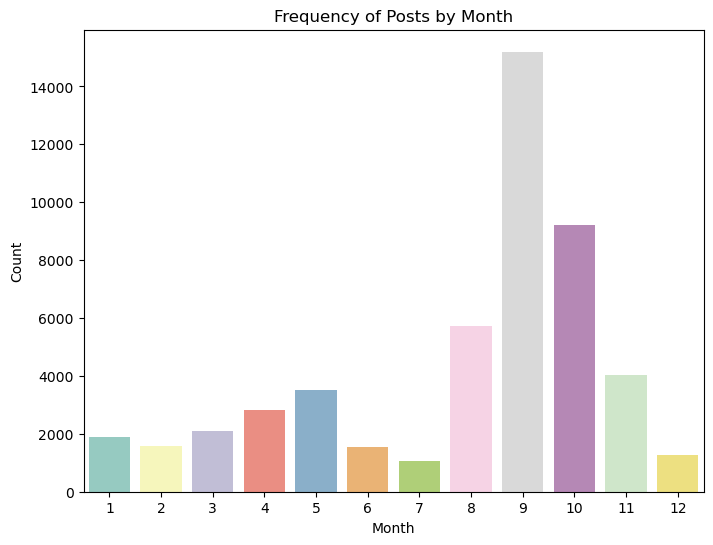

In [23]:
# Univariate analysis for the "Month" variable using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Month', palette='Set3')

plt.title('Frequency of Posts by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()



**September has the highest frequency of posts**

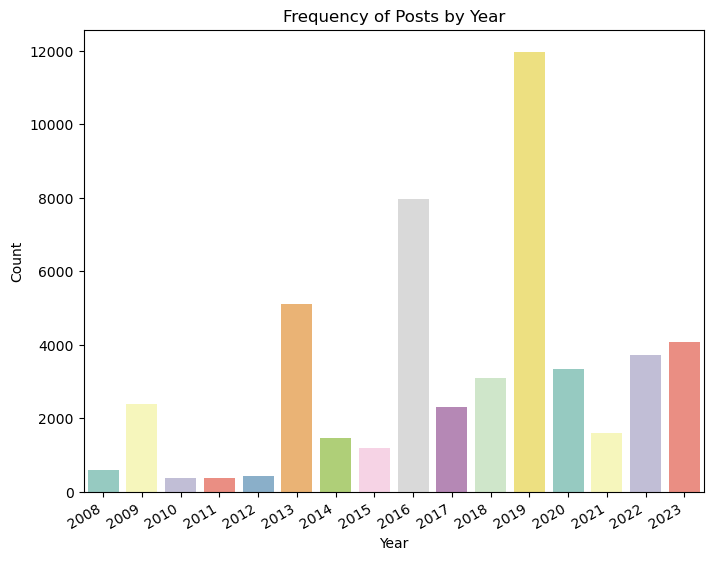

In [24]:
# Univariate analysis for the "Year" variable

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Year', palette='Set3')
plt.title('Frequency of Posts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.show()




**The year 2019 has the highest number of posts**

### Bivariate Analysis

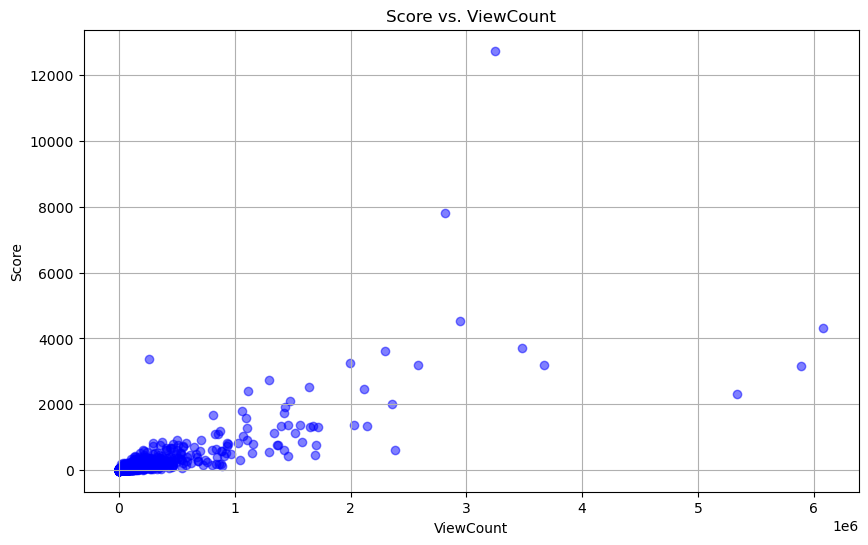

In [25]:

# Extract the 'Score' and 'ViewCount' columns
score = data['Score']
view_count = data['ViewCount']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(view_count, score, color='blue', alpha=0.5)

plt.title('Score vs. ViewCount')
plt.xlabel('ViewCount')
plt.ylabel('Score')

plt.grid(True)

plt.show()

**We can observe a couple of outliers. We need to perform more analysis to understand how they come about**

### Time Series Plot

Explore trends over time using the CreationDate, LastActivityDate column. You could create a time series plot to visualize the distribution of questions over the years.

**CreationDate Analysis**

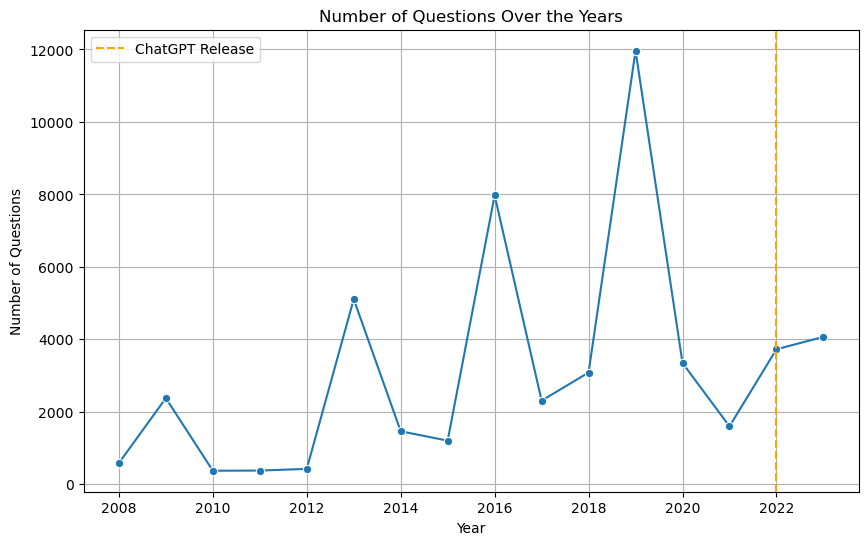

In [26]:

# Group by year and count the number of questions
questions_per_year = data['CreationDate'].dt.year.value_counts().sort_index()

# Plotting the time series using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=questions_per_year.index, y=questions_per_year.values, marker='o')

# Add a vertical line for ChatGPT release
release_date = pd.to_datetime('2022-11-01')
plt.axvline(x=release_date.year, color='orange', linestyle='--', label='ChatGPT Release')

plt.title('Number of Questions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.grid(True)

plt.legend()  # Add legend to display the label for ChatGPT release

plt.show()



In [27]:
# Analyze trends over time
# Overall Trend
overall_trend = 'increasing' if questions_per_year.values[-1] > questions_per_year.values[0] else 'decreasing'

# Identify spikes or dips
spikes_or_dips = []
for i in range(1, len(questions_per_year) - 1):
    if questions_per_year.values[i] > questions_per_year.values[i - 1] and questions_per_year.values[i] > questions_per_year.values[i + 1]:
        spikes_or_dips.append((questions_per_year.index[i], 'spike'))
    elif questions_per_year.values[i] < questions_per_year.values[i - 1] and questions_per_year.values[i] < questions_per_year.values[i + 1]:
        spikes_or_dips.append((questions_per_year.index[i], 'dip'))

# Seasonal Patterns
# Assuming a season is a year
seasonal_patterns = questions_per_year.groupby(questions_per_year.index % 1).mean()

# Major Changes
significant_changes = []
for i in range(1, len(questions_per_year)):
    change_percentage = ((questions_per_year.values[i] - questions_per_year.values[i - 1]) / questions_per_year.values[i - 1]) * 100
    if abs(change_percentage) > 20:  # Consider a change of more than 20% as significant
        significant_changes.append((questions_per_year.index[i], change_percentage))

# Print analysis results
print(f'Overall Trend: {overall_trend}')
print("-----" * 25)
print('Spikes or Dips:', spikes_or_dips)
print("-----" * 25)
print('Seasonal Patterns:', seasonal_patterns)
print("-----" * 25)
print('Major Changes:', significant_changes)


Overall Trend: increasing
-----------------------------------------------------------------------------------------------------------------------------
Spikes or Dips: [(2009, 'spike'), (2010, 'dip'), (2013, 'spike'), (2015, 'dip'), (2016, 'spike'), (2017, 'dip'), (2019, 'spike'), (2021, 'dip')]
-----------------------------------------------------------------------------------------------------------------------------
Seasonal Patterns: CreationDate
0    3125.0
Name: count, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Major Changes: [(2009, 305.80204778156997), (2010, -84.23044575273339), (2013, 1099.2957746478874), (2014, -71.34468584850265), (2016, 561.8257261410788), (2017, -71.04702194357367), (2018, 33.60762234733651), (2019, 287.87682333873585), (2020, -72.02908240013372), (2021, -52.19599641469973), (2022, 132.9375)]


#### Overall Trend: increasing
The overall trend of the number of questions is increasing over the years. This indicates a growth in user activity or interest in the platform.

#### Spikes or Dips:
- Spike in 2009: There was a significant increase in the number of questions in 2009.
- Dip in 2010: A substantial decrease in the number of questions in 2010.
- Spike in 2013: A notable increase in the number of questions in 2013.
- Dip in 2015: A significant decrease in the number of questions in 2015.
- Spike in 2016: Another substantial increase in 2016.
- Dip in 2017: A decrease in the number of questions in 2017.
- Spike in 2019: A significant increase in 2019.
- Dip in 2021: A decrease in the number of questions in 2021.

#### Seasonal Patterns:
The analysis assumes a season is a year. The mean count for each "season" (year) is 3125 questions.
This suggests that, on average, there are 3125 questions per year.

#### Major Changes:

- 2009: The number of questions increased by approximately 305.80% compared to the previous year.
- 2010: A significant decrease of approximately -84.23% in the number of questions compared to the previous year.
- 2013: A substantial increase of approximately 1099.30%.
- 2014: A significant decrease of approximately -71.34%.
- 2016: Another substantial increase of approximately 561.83%.
- 2017: A decrease of approximately -71.05%.
- 2018: An increase of approximately 33.61%.
- 2019: A substantial increase of approximately 287.88%.
- 2020: A decrease of approximately -72.03%.
- 2021: A decrease of approximately -52.20%.
- 2022: An increase of approximately 132.94%.

**LastActivityDate Analysis**

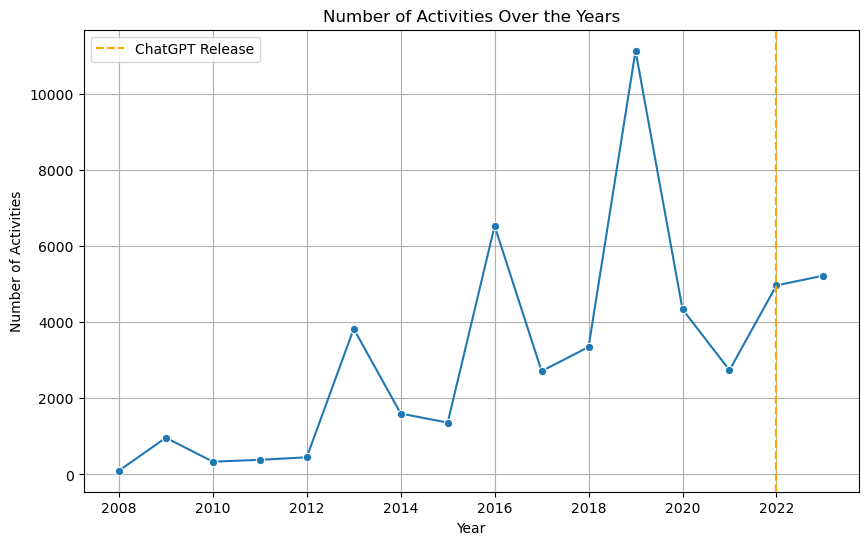

In [28]:
# Convert 'LastActivityDate' column to datetime
data['LastActivityDate'] = pd.to_datetime(data['LastActivityDate'])

# Group by year and count the number of activities
activities_per_year = data['LastActivityDate'].dt.year.value_counts().sort_index()

# Plotting the time series using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=activities_per_year.index, y=activities_per_year.values, marker='o')

# Add a vertical line for ChatGPT release
release_date = pd.to_datetime('2022-11-01')
plt.axvline(x=release_date.year, color='orange', linestyle='--', label='ChatGPT Release')

plt.title('Number of Activities Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Activities')
plt.grid(True)

plt.legend()  # Add legend to display the label for ChatGPT release

plt.show()

In [29]:
# Analyze trends over time
# Overall Trend
overall_trend_activities = 'increasing' if activities_per_year.values[-1] > activities_per_year.values[0] else 'decreasing'

# Identify spikes or dips
spikes_or_dips_activities = []
for i in range(1, len(activities_per_year) - 1):
    if activities_per_year.values[i] > activities_per_year.values[i - 1] and activities_per_year.values[i] > activities_per_year.values[i + 1]:
        spikes_or_dips_activities.append((activities_per_year.index[i], 'spike'))
    elif activities_per_year.values[i] < activities_per_year.values[i - 1] and activities_per_year.values[i] < activities_per_year.values[i + 1]:
        spikes_or_dips_activities.append((activities_per_year.index[i], 'dip'))

# Seasonal Patterns
# Assuming a season is a year
seasonal_patterns_activities = activities_per_year.groupby(activities_per_year.index % 1).mean()

# Major Changes
significant_changes_activities = []
for i in range(1, len(activities_per_year)):
    change_percentage = ((activities_per_year.values[i] - activities_per_year.values[i - 1]) / activities_per_year.values[i - 1]) * 100
    if abs(change_percentage) > 20:  # Consider a change of more than 20% as significant
        significant_changes_activities.append((activities_per_year.index[i], change_percentage))

# Print analysis results for LastActivityDate
print(f'Overall Trend for LastActivityDate: {overall_trend_activities}')
print("-----" * 25)
print('Spikes or Dips for LastActivityDate:', spikes_or_dips_activities)
print("-----" * 25)
print('Seasonal Patterns for LastActivityDate:', seasonal_patterns_activities)
print("-----"* 25)
print('Major Changes for LastActivityDate:', significant_changes_activities)

Overall Trend for LastActivityDate: increasing
-----------------------------------------------------------------------------------------------------------------------------
Spikes or Dips for LastActivityDate: [(2009, 'spike'), (2010, 'dip'), (2013, 'spike'), (2015, 'dip'), (2016, 'spike'), (2017, 'dip'), (2019, 'spike'), (2021, 'dip')]
-----------------------------------------------------------------------------------------------------------------------------
Seasonal Patterns for LastActivityDate: LastActivityDate
0    3125.0
Name: count, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Major Changes for LastActivityDate: [(2009, 893.8144329896908), (2010, -65.24896265560166), (2013, 750.4444444444445), (2014, -58.191795139796184), (2016, 379.85294117647055), (2017, -58.42782715292676), (2018, 23.405823811279028), (2019, 232.46714456391877), (2020, -61.01877639026143), (2021, -36.8748559575939

#### Overall Trend for LastActivityDate: 
The overall trend for LastActivityDate is increasing. This suggests a general growth in user activities or engagement over the years.

#### Spikes or Dips for LastActivityDate: 
The spikes and dips indicate years where there are notable increases (spikes) or decreases (dips) in user activity. 
For example, 2009, 2013, 2016, and 2019 show spikes,
while 2010, 2015, 2017, and 2021 show dips. 
These variations could be due to external factors or changes in user behavior.

#### Seasonal Patterns for LastActivityDate: 
The value 3125.0 in the "Year_LastActivity" column doesn't provide specific insights into seasonal patterns. It might be an artifact of how the data is structured. Seasonal patterns are typically observed when looking at monthly or quarterly data.

#### Major Changes for LastActivityDate:
The significant changes represent years where there is a substantial percentage change in user activity compared to the previous year. For instance:

- 2009 had a significant increase of approximately 893.81%.
- 2010 experienced a decrease of about -65.25%, indicating a dip in user activities.
- 2013 saw a remarkable increase of around 750.44%.
- 2016 had a substantial increase of about 379.85%.
- 2019 showed a significant increase of approximately 232.47%.
- 2020 experienced a decrease of about -61.02%, indicating a dip in user activities.
- 2022 is showing a substantial increase of around 81.31%.

These major changes could be influenced by various factors, such as changes in platform features, user base, or external events.

### Correlation Matrix

Check for correlations between different numerical columns. For example, does the score correlate with the number of views or the number of answers?

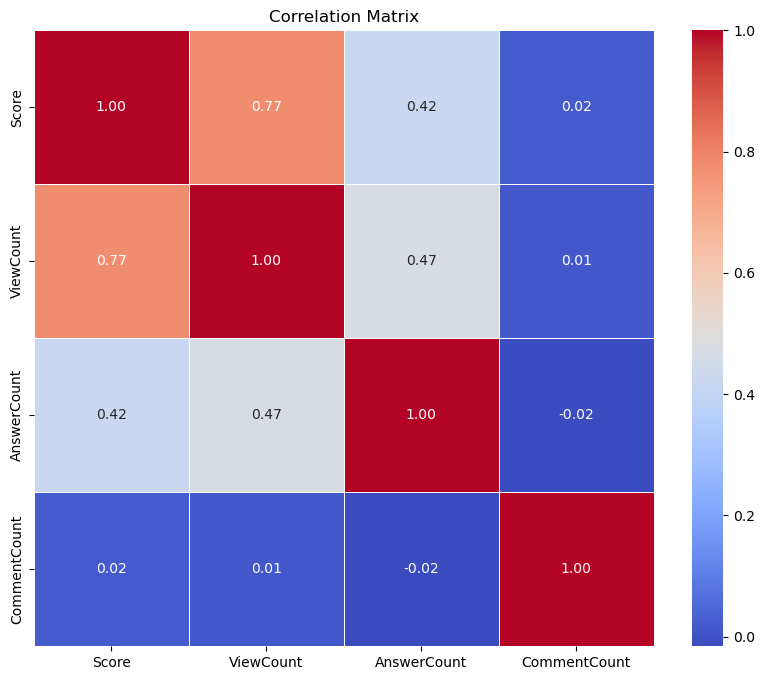

In [30]:
# Select numerical columns for correlation analysis
numeric_columns = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Calculate correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Intepretation:**
Each cell in the correlation matrix represents a correlation coefficient between two variables. 
The coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation (as one variable increases, the other also increases),
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases),
- 0 indicates no correlation.

`Heatmap Colors:`

The heatmap uses colors to represent the correlation coefficients:
Warm colors (closer to 1) represent positive correlations.
Cool colors (closer to -1) represent negative correlations.
Neutral colors (around 0) represent no or weak correlations.


Now, let's interpret the specific correlations in your heatmap:

**Score and ViewCount:**
The correlation coefficient is positive (0.77), indicating a strong positive correlation. This suggests that questions with higher scores tend to have higher view counts.

**Score and AnswerCount:**
The correlation coefficient is positive (0.42), indicating a moderate positive correlation. This suggests that questions with higher scores tend to have more answers.

**Score and CommentCount:**
The correlation coefficient is positive (0.02), indicating a very weak positive correlation. This suggests that there is almost no correlation between the scores and the number of comments.

**ViewCount and AnswerCount:**
The correlation coefficient is positive (0.47), indicating a moderate positive correlation. This suggests that questions with higher view counts tend to have more answers.

**ViewCount and CommentCount:**
The correlation coefficient is positive (0.01), indicating a very weak positive correlation. This suggests that there is almost no correlation between the view counts and the number of comments.

**AnswerCount and CommentCount:**
The correlation coefficient is negative (-0.02), indicating a very weak negative correlation. This suggests that there is almost no correlation between the number of answers and the number of comments


### Analysis of Quality of Questions Over Time
We assessed whether questions received more upvotes or views after the introduction of ChatGPT. This analysis helped us determine whether ChatGPT had an impact on the quality and popularity of questions on the platform.

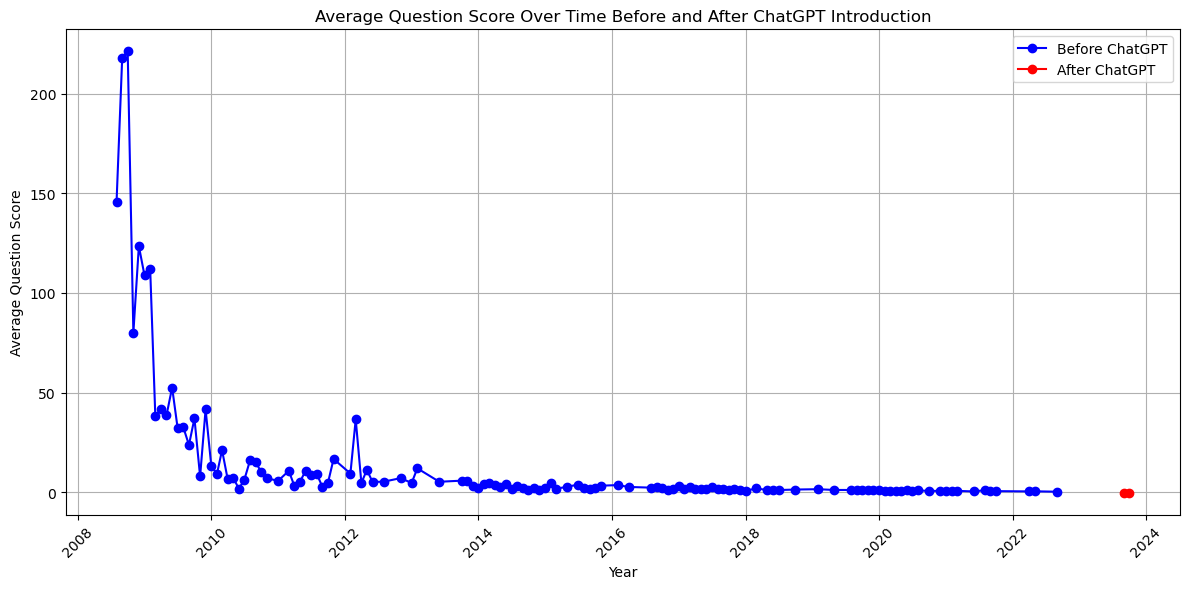

In [59]:
# Filter the data to include only entries before ChatGPT's introduction
start_date_before = pd.to_datetime('2022-11-01')
data_before_chatgpt = data[data['CreationDate'] < start_date_before]

# Filter the data to include only entries after ChatGPT's introduction
start_date_after = pd.to_datetime('2022-11-01')
data_after_chatgpt = data[data['CreationDate'] >= start_date_after]

# Sort both filtered datasets by 'CreationDate' in ascending order
data_before_chatgpt = data_before_chatgpt.sort_values(by='CreationDate')
data_after_chatgpt = data_after_chatgpt.sort_values(by='CreationDate')

# Calculate the average question score for each period
average_score_before = data_before_chatgpt.groupby(data_before_chatgpt['CreationDate'].dt.to_period('M'))['Score'].mean()
average_score_after = data_after_chatgpt.groupby(data_after_chatgpt['CreationDate'].dt.to_period('M'))['Score'].mean()

# Convert the PeriodIndex to a DatetimeIndex
average_score_before.index = average_score_before.index.to_timestamp()
average_score_after.index = average_score_after.index.to_timestamp()

# Create a time series plot to visualize the average question score over time
plt.figure(figsize=(12, 6))

plt.plot(average_score_before.index, average_score_before.values, marker='o', linestyle='-', color='b', label='Before ChatGPT')
plt.plot(average_score_after.index, average_score_after.values, marker='o', linestyle='-', color='r', label='After ChatGPT')
plt.title('Average Question Score Over Time Before and After ChatGPT Introduction')
plt.xlabel('Year')
plt.ylabel('Average Question Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Findings

The average question score in the years before the introduction of ChatGPT was relatively stable, hovering around 0.There has not been a significant change in the the score ,thus,the quality of questions asked since the introduction of chatGPT 

## Analysis of Python Tag Evolution Over Time

In this analysis, we explored the evolution of the most coommon tage,Python, on Stack Overflow. Our primary focus was to understand how this tag has evolved in terms of question volume, quality, and complexity over time. The objective was to identify any significant changes that might be attributed to the introduction of ChatGPT and to gain insights into the impact of AI assistance on this programming domain.

### Key Metrics

We examined three key metrics to assess the evolution of the  tag-year combination:

- **Question Volume:** This metric represented the total number of questions asked over time.
- **Average Question Score:** A measure of question quality, calculated as the mean score (upvotes minus downvotes).
- **Average Answer Count:** An indicator of question complexity, determined by the mean number of answers received.
technology and coding.


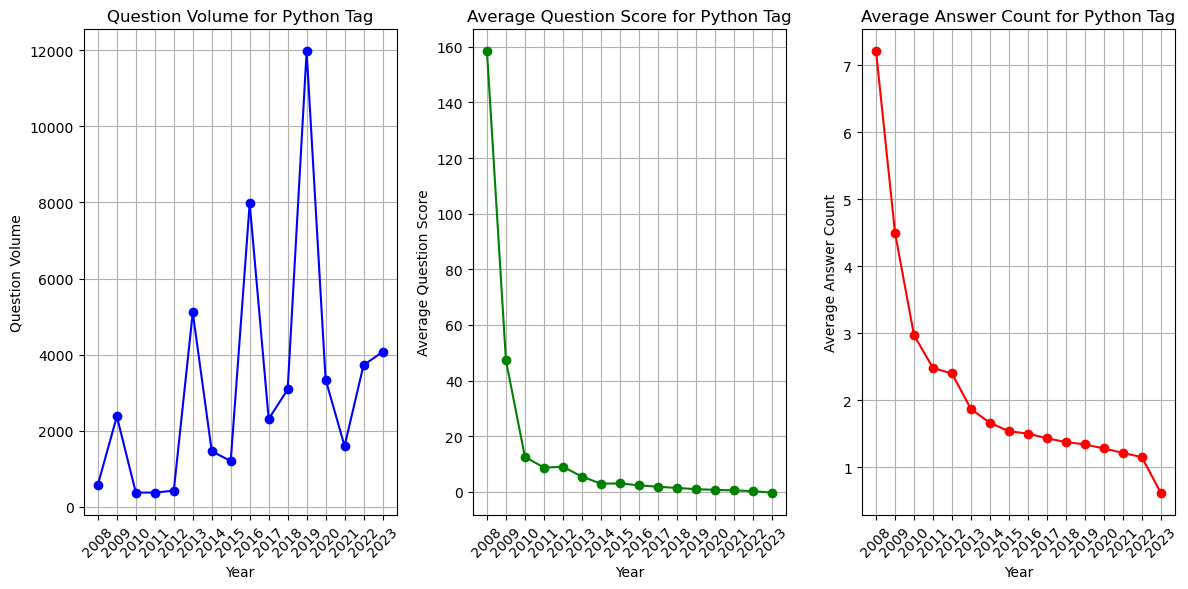

In [57]:
# Define the relevant tag (e.g., 'python')
relevant_tag = 'python'

# Filter the data to include only questions with the relevant tag
data_with_relevant_tag = data[data['Tags'].str.lower().str.contains(relevant_tag)]

# Group the data by year
data_grouped = data_with_relevant_tag.groupby(data_with_relevant_tag['CreationDate'].dt.year)

# Calculate statistics for the relevant tag and year
tag_stats = data_grouped.agg({
    'Id': 'count',                # Question volume
    'Score': 'mean',              # Average question score
    'AnswerCount': 'mean'         # Average answer count
}).reset_index()

# Create separate plots for each metric
plt.figure(figsize=(12, 6))

# Question Volume
plt.subplot(131)
plt.plot(tag_stats['CreationDate'], tag_stats['Id'], marker='o', linestyle='-', color='b')
plt.title(f'Question Volume for {relevant_tag.capitalize()} Tag')
plt.xlabel('Year')
plt.ylabel('Question Volume')
plt.xticks(tag_stats['CreationDate'].astype(int), rotation=45)  # Display only the integer part of years
plt.grid(True)

# Average Question Score
plt.subplot(132)
plt.plot(tag_stats['CreationDate'], tag_stats['Score'], marker='o', linestyle='-', color='g')
plt.title(f'Average Question Score for {relevant_tag.capitalize()} Tag')
plt.xlabel('Year')
plt.ylabel('Average Question Score')
plt.xticks(tag_stats['CreationDate'].astype(int), rotation=45)  # Display only the integer part of years
plt.grid(True)

# Average Answer Count
plt.subplot(133)
plt.plot(tag_stats['CreationDate'], tag_stats['AnswerCount'], marker='o', linestyle='-', color='r')
plt.title(f'Average Answer Count for {relevant_tag.capitalize()} Tag')
plt.xlabel('Year')
plt.ylabel('Average Answer Count')
plt.xticks(tag_stats['CreationDate'].astype(int), rotation=45)  # Display only the integer part of years
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Our analysis yielded several noteworthy findings:

1. **Question Volume:** Over the years, we observed varying question volumes for the python tag. The tag shows an upward trend coming into 2023, indicating increased interest.

2. **Average Question Score:** there has been a decline in the question quality as reflected by the declining average scores, indicating that the precision and value of inquiries remained.

3. **Average Answer Count:** The python tag exhibited a downward trend, which is likely to persist after the introduction of ChatGPT. This decline in the average number of answers per question suggests a shift towards less engaging discussions and possibly less complex problem-solving within the python domain.
